In [19]:
import pandas as pd
import numpy as np

#DRAVIN - L

In [20]:
data=pd.read_csv("bank_data.csv")

In [21]:
data.isnull().sum()  

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

In [22]:
print(data['id'].unique().shape)
print(data.shape)

(1882,)
(1882, 6)


In [23]:
data.describe()

id  expected_recovery_amount  actual_recovery_amount  \
count  1882.000000               1882.000000             1882.000000   
mean   1035.596174               2759.967588             4000.967837   
std     591.458429               2019.826565             4576.506350   
min       6.000000                194.000000              200.425000   
25%     534.250000               1261.250000             1045.190300   
50%    1029.500000               2062.000000             2115.446373   
75%    1551.750000               3569.500000             5417.237207   
max    2056.000000               9964.000000            34398.479710   

               age  
count  1882.000000  
mean     39.650372  
std      15.453072  
min      18.000000  
25%      28.000000  
50%      35.000000  
75%      50.000000  
max      84.000000

In [24]:
data.head()

id  expected_recovery_amount  actual_recovery_amount recovery_strategy  \
0  2030                       194                 263.540  Level 0 Recovery   
1  1150                       486                 416.090  Level 0 Recovery   
2   380                       527                 429.350  Level 0 Recovery   
3  1838                       536                 296.990  Level 0 Recovery   
4  1995                       541                 346.385  Level 0 Recovery   

   age     sex  
0   19    Male  
1   25  Female  
2   27    Male  
3   25    Male  
4   34    Male

In [25]:
level_zero=data.loc[(data.expected_recovery_amount >=0)&(data.expected_recovery_amount <=1000)]
level_zero

id  expected_recovery_amount  actual_recovery_amount recovery_strategy  \
0    2030                       194                 263.540  Level 0 Recovery   
1    1150                       486                 416.090  Level 0 Recovery   
2     380                       527                 429.350  Level 0 Recovery   
3    1838                       536                 296.990  Level 0 Recovery   
4    1995                       541                 346.385  Level 0 Recovery   
..    ...                       ...                     ...               ...   
242   618                       993                 790.480  Level 0 Recovery   
243  1779                       993                 518.300  Level 0 Recovery   
244  1963                       996                1225.660  Level 0 Recovery   
245   391                       998                 763.270  Level 0 Recovery   
246   206                      1000                1119.870  Level 0 Recovery   

     age     sex  
0     19    Male  
1     25  Female  
2     27    Male  
3     25    Male  
4     34    Male  
..   ...     ...  
242   22    Male  
243   36  Female  
244   29  Female  
245   26  Female  
246   28    Male  

[247 rows x 6 columns]

In [26]:
level_one=data.loc[(data.expected_recovery_amount >1000)&(data.expected_recovery_amount <=2000)]
level_one

id  expected_recovery_amount  actual_recovery_amount recovery_strategy  \
247  1629                      1001             1723.549220  Level 1 Recovery   
248  2021                      1001              612.777647  Level 1 Recovery   
249  1478                      1002             1659.941630  Level 1 Recovery   
250   153                      1005              735.264893  Level 1 Recovery   
251  1359                      1007              775.670190  Level 1 Recovery   
..    ...                       ...                     ...               ...   
912  1282                      1988             1475.957452  Level 1 Recovery   
913  1879                      1988             2508.799693  Level 1 Recovery   
914   922                      1990             2072.971170  Level 1 Recovery   
915  1025                      1992             1364.515730  Level 1 Recovery   
916   213                      1997             2694.498800  Level 1 Recovery   

     age     sex  
247   35    Male  
248   25  Female  
249   31    Male  
250   33    Male  
251   26  Female  
..   ...     ...  
912   28  Female  
913   34  Female  
914   40    Male  
915   23    Male  
916   33    Male  

[670 rows x 6 columns]

In [27]:
level_one.shape

(670, 6)

<Axes: xlabel='sex', ylabel='expected_recovery_amount'>

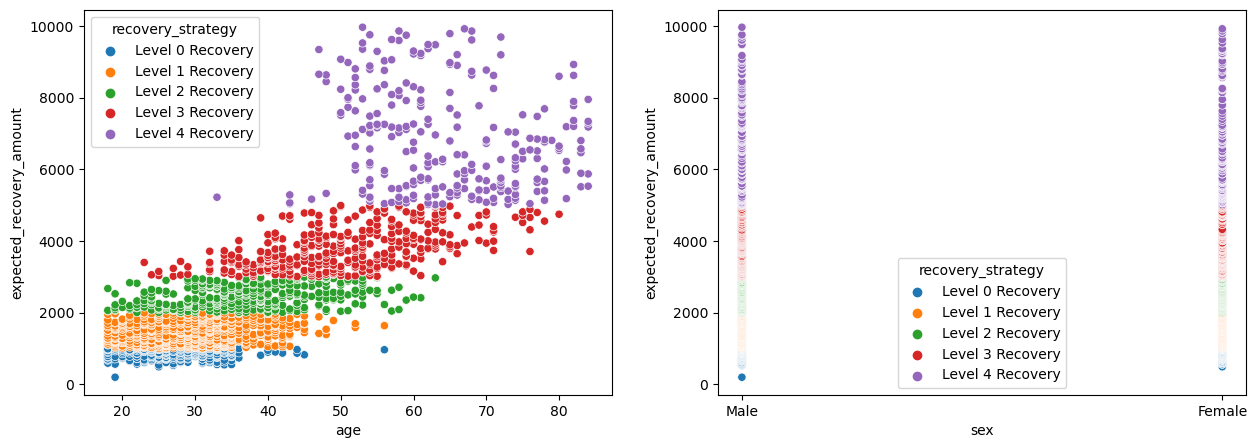

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axes=plt.subplots(1,2,figsize=(15,5))

sns.scatterplot(ax=axes[0],data=data,y='expected_recovery_amount',x='age',hue='recovery_strategy')
sns.scatterplot(ax=axes[1],data=data,y='expected_recovery_amount',x='sex',hue='recovery_strategy')


<Axes: xlabel='sex', ylabel='expected_recovery_amount'>

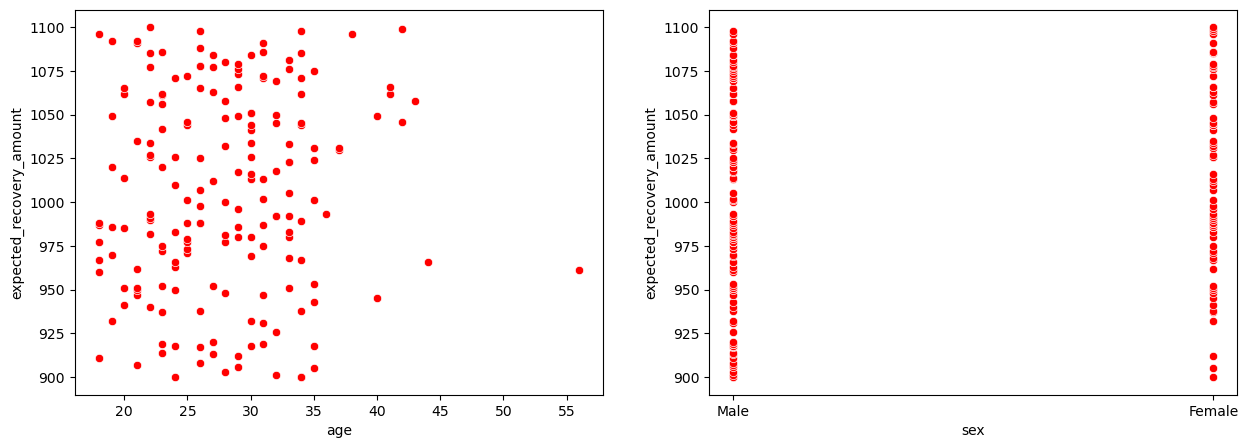

In [29]:
level_just_above_below=data.loc[(data.expected_recovery_amount >=900)&(data.expected_recovery_amount <=1100)]
level_just_above_below_compare=data.loc[(data.expected_recovery_amount >=950)&(data.expected_recovery_amount <=1050)]

fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(ax=axes[0],data=level_just_above_below,x='age',y='expected_recovery_amount',color='red')
sns.scatterplot(ax=axes[1],data=level_just_above_below,x='sex',y='expected_recovery_amount',color='red')

<Axes: xlabel='actual_recovery_amount', ylabel='expected_recovery_amount'>

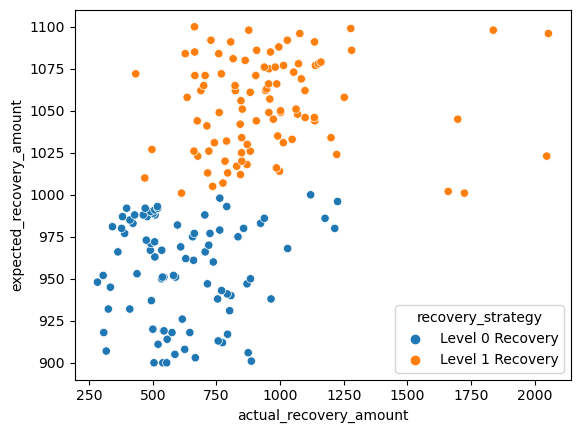

In [30]:
sns.scatterplot(data=level_just_above_below,x='actual_recovery_amount',y='expected_recovery_amount',hue='recovery_strategy')

<Axes: xlabel='actual_recovery_amount', ylabel='expected_recovery_amount'>

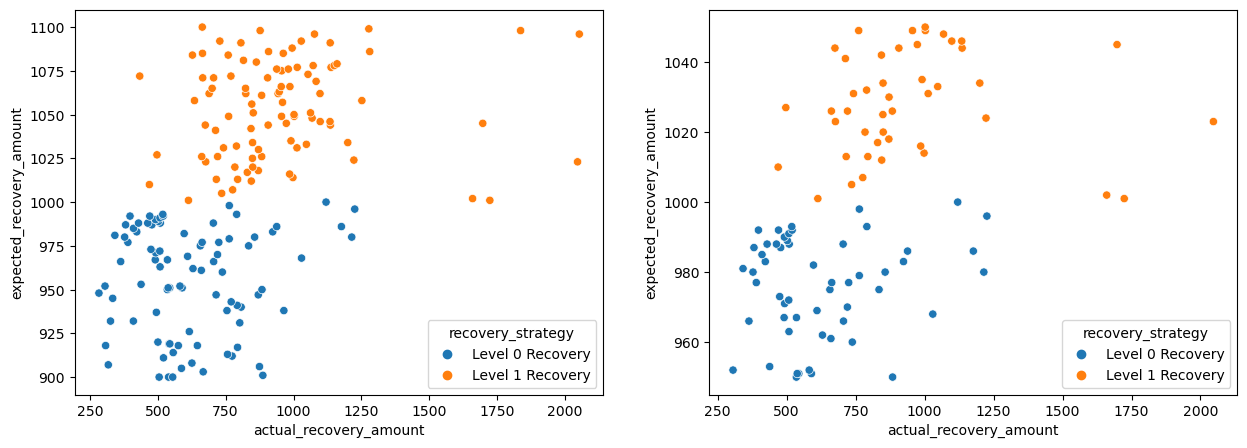

In [31]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(ax=axes[0],data=level_just_above_below,x='actual_recovery_amount',y='expected_recovery_amount',hue='recovery_strategy')
sns.scatterplot(ax=axes[1],data=level_just_above_below_compare,x='actual_recovery_amount',y='expected_recovery_amount',hue='recovery_strategy')

In [32]:
from scipy.stats import kruskal

# Filter the data between 
1100
data_filtered = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] <= 1100)]

# Group the data by any categorical variable, if applicable
groups = data_filtered.groupby('actual_recovery_amount')['expected_recovery_amount'].apply(list)

# Perform the Kruskal-Wallis test
statistic, pvalue = kruskal(*groups)

# Print the results
print("Kruskal-Wallis test statistic(900-1100):", statistic)
print("p-value:", pvalue)
     




data_filtered = data[(data['expected_recovery_amount'] >= 950) & (data['expected_recovery_amount'] <= 1050)]

# Group the data by any categorical variable, if applicable
groups = data_filtered.groupby('actual_recovery_amount')['expected_recovery_amount'].apply(list)

# Perform the Kruskal-Wallis test
statistic, pvalue = kruskal(*groups)

# Print the results
print("Kruskal-Wallis test statistic(950-1050):", statistic)
print("p-value:", pvalue)

Kruskal-Wallis test statistic(900-1100): 183.0
p-value: 0.48609714517719294
Kruskal-Wallis test statistic(950-1050): 99.0
p-value: 0.4810969124082639


In [33]:
#REGRESSION ON DATA BETWEEN $900 & $1100

X=level_just_above_below['expected_recovery_amount'].values.reshape(-1,1)
y=level_just_above_below['actual_recovery_amount'].values.reshape(-1,1)

# train_X,test_X,train_Y,test_Y=train_test_split(X,y,test_size=0.2,random_state=1)

In [53]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)

LinearRegression()

Text(0.5, 1.0, 'NO THRESHOLD PREDICTIONS BETWEEN $900 & $1100 DOLLARS')

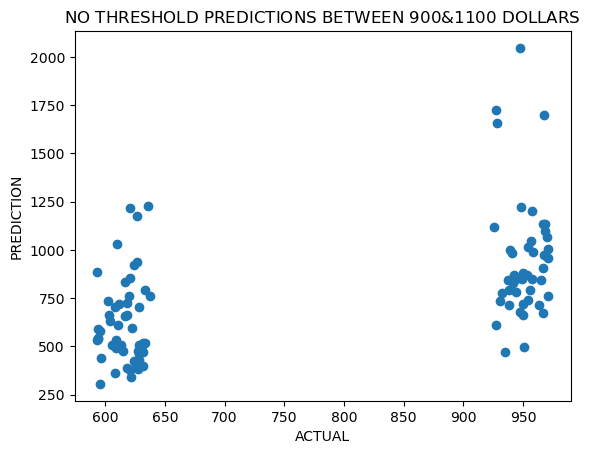

In [54]:
plt.scatter(model.predict(X),y)
plt.xlabel('ACTUAL')
plt.ylabel('PREDICTION')
plt.title('NO THRESHOLD PREDICTIONS BETWEEN $900 & $1100 DOLLARS')

In [ ]:
pred=model.predict(X)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y,pred)
print(" The R squared value after setting the range between 900 and 1100 dollars is ", r2)


 The R squared value after setting the range between 900 and 1100 dollars is  0.2525016112411572


/var/folders/hl/sjfclv052hg0n7c8qc5zhky00000gn/T/ipykernel_19670/945901399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  level_just_above_below['threshold']=(level_just_above_below['expected_recovery_amount']>=1000).astype(int)


Text(0.5, 1.0, 'THRESHOLD SET AT $1000')

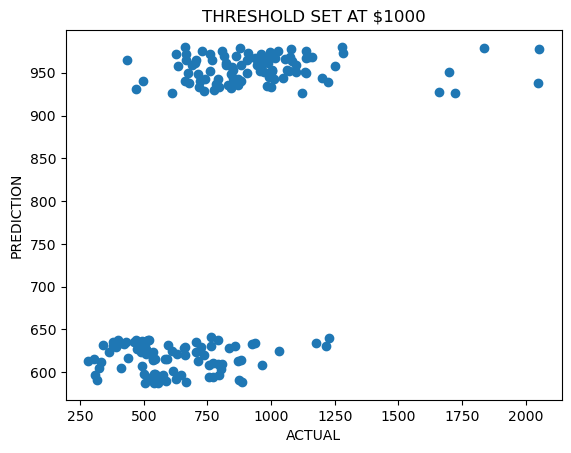

In [ ]:
threshold=1000
level_just_above_below['threshold']=(level_just_above_below['expected_recovery_amount']>=1000).astype(int)

model_with_threshold=LinearRegression()

X_threshold=level_just_above_below[['expected_recovery_amount', 'threshold']].values.reshape(-1,2)
y_threshold=level_just_above_below['actual_recovery_amount'].values.reshape(-1,1)

model_with_threshold.fit(X_threshold,y_threshold)


plt.scatter(y_threshold,model_with_threshold.predict(X_threshold))
plt.xlabel('ACTUAL')
plt.ylabel('PREDICTION')
plt.title('THRESHOLD SET AT $1000')

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_threshold,model_with_threshold.predict(X_threshold))
print(" The R squared value is ", r2)

 The R squared value is  0.3087807404751848


/var/folders/hl/sjfclv052hg0n7c8qc5zhky00000gn/T/ipykernel_19670/3576849953.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  level_just_above_below_compare['threshold']=(level_just_above_below['expected_recovery_amount']>=1000).astype(int)


Text(0.5, 1.0, 'NO THRESHOLD')

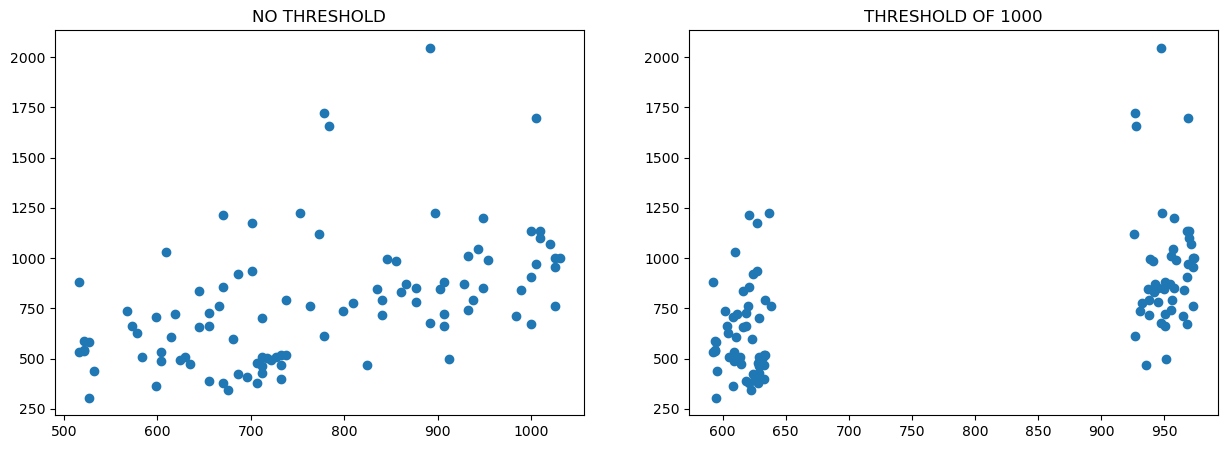

In [ ]:
#REGRESSION ON DATA BETWEEN $950 & $1050

fig,axes=plt.subplots(1,2,figsize=(15,5))

X_rep=level_just_above_below_compare['expected_recovery_amount'].values.reshape(-1,1)
y_rep=level_just_above_below_compare['actual_recovery_amount'].values.reshape(-1,1)


model_repeat_on_new_range=LinearRegression()
model_repeat_on_new_range.fit(X_rep,y_rep)

pred3=model_repeat_on_new_range.predict(X_rep)

level_just_above_below_compare['threshold']=(level_just_above_below['expected_recovery_amount']>=1000).astype(int)

trainX=level_just_above_below_compare[['expected_recovery_amount', 'threshold']].values.reshape(-1,2)
trainY=level_just_above_below_compare['actual_recovery_amount'].values.reshape(-1,1)

model4=LinearRegression()
model4.fit(trainX,trainY)
pred4=model4.predict(trainX)
axes[0].scatter(model_repeat_on_new_range.predict(X_rep),y_rep)
axes[1].scatter(pred4,trainY)
axes[1].set_title('THRESHOLD OF 1000')
axes[0].set_title('NO THRESHOLD')

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(trainY,pred4)
print(" The R squared value is ", r2)

 The R squared value is  0.28733143665781835


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.253
Model:                                OLS   Adj. R-squared:                  0.248
Method:                     Least Squares   F-statistic:                     61.48
Date:                    Tue, 25 Jul 2023   Prob (F-statistic):           3.65e-13
Time:                            12:37:18   Log-Likelihood:                -1286.5
No. Observations:                     184   AIC:                             2577.
Df Residuals:                         182   BIC:                             2583.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

Text(0, 0.5, 'actual')

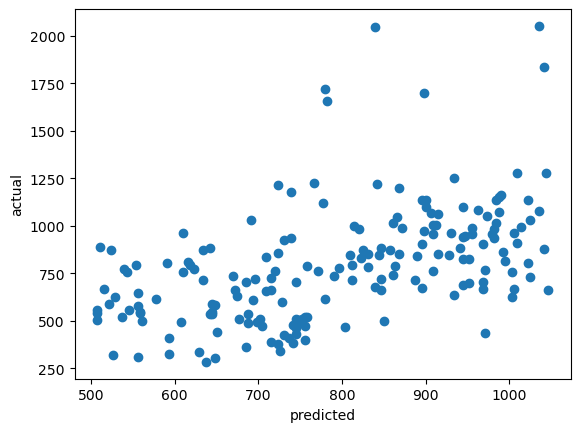

In [42]:
import statsmodels.api as sm

# Define X and y
X = level_just_above_below['expected_recovery_amount']
y = level_just_above_below['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the model summary statistics
print(model.summary())

plt.scatter(model.predict(X),y)
plt.xlabel("predicted")
plt.ylabel("actual")



                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.253
Model:                                OLS   Adj. R-squared:                  0.248
Method:                     Least Squares   F-statistic:                     61.48
Date:                    Tue, 25 Jul 2023   Prob (F-statistic):           3.65e-13
Time:                            12:37:07   Log-Likelihood:                -1286.5
No. Observations:                     184   AIC:                             2577.
Df Residuals:                         182   BIC:                             2583.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

Text(0, 0.5, 'actual')

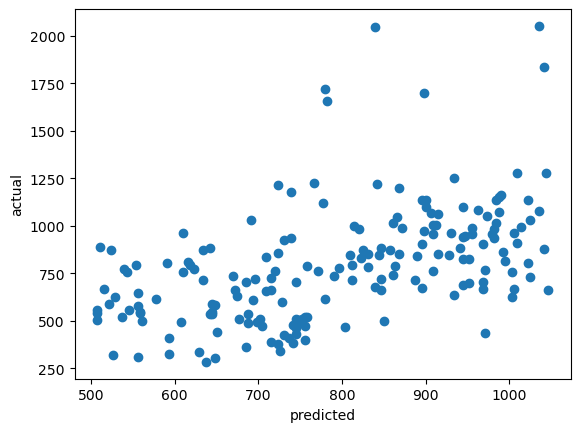

In [41]:
data['indicator_1000'] = np.where(data['expected_recovery_amount']<1000, 0, 1)

X = level_just_above_below['expected_recovery_amount']
y = level_just_above_below['actual_recovery_amount']
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

print(model.summary())
plt.scatter(model.predict(X),y)
plt.xlabel("predicted")
plt.ylabel("actual")


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.283
Model:                                OLS   Adj. R-squared:                  0.269
Method:                     Least Squares   F-statistic:                     18.99
Date:                    Tue, 25 Jul 2023   Prob (F-statistic):           1.12e-07
Time:                            12:41:21   Log-Likelihood:                -692.92
No. Observations:                      99   AIC:                             1392.
Df Residuals:                          96   BIC:                             1400.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

Text(0, 0.5, 'actual')

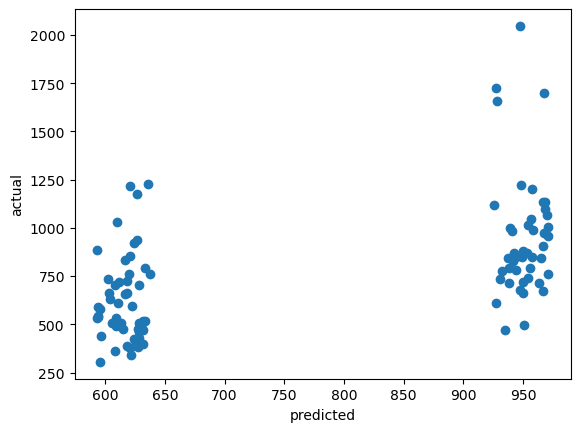

In [49]:
data_950_1050 = data.loc[(data['expected_recovery_amount']<1050) &
                      (data['expected_recovery_amount']>=950)]

X = data_950_1050[['expected_recovery_amount','indicator_1000']]
y = data_950_1050['actual_recovery_amount']
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

print(model.summary())
plt.scatter(model.predict(X),y)
plt.xlabel("predicted")
plt.ylabel("actual")